In [129]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [130]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [131]:
x_train=x_train/255
x_test=x_test/255

In [132]:
len(x_train)

60000

In [133]:
x_train[0].shape

(28, 28)

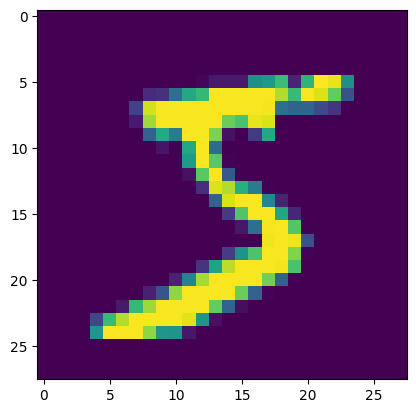

In [134]:
plt.imshow(x_train[0])
plt.show()

In [135]:
y_train[0]

5

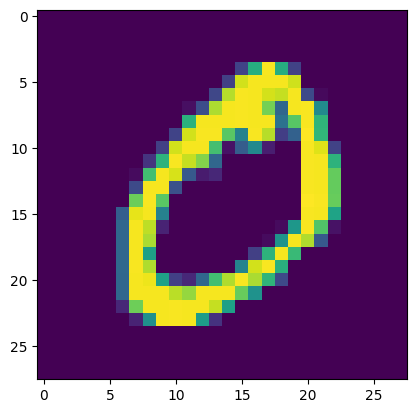

In [136]:
plt.imshow(x_train[1])
plt.show()

In [137]:
y_train.shape

(60000,)

In [138]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [139]:
model=keras.Sequential([
    keras.Input(shape=(28*28,)),
    keras.layers.Dense(units=10,activation='sigmoid')
    
])
model.compile(optimizer='Adam',loss=keras.losses.sparse_categorical_crossentropy,metrics=['Accuracy'])

In [140]:
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4710 - Accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - Accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - Accuracy: 0.9217
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - Accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - Accuracy: 0.9258


In [141]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2671 - Accuracy: 0.9262


[0.2670651972293854, 0.9261999726295471]

In [142]:
yhat=model.predict(x_test_flatten)

313/313 [==============================] - 0s 1ms/step


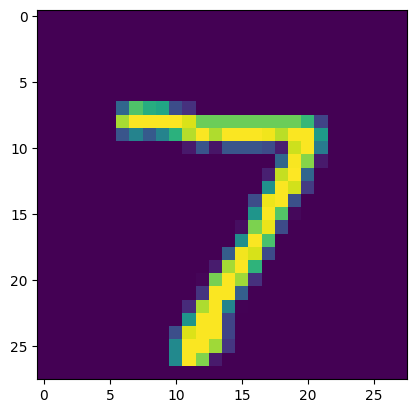

In [143]:
plt.imshow(x_test[0])
plt.show()

In [144]:
np.argmax(yhat[0])

7

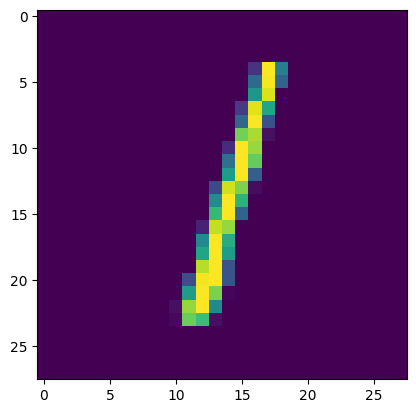

In [145]:
plt.imshow(x_test[2])
plt.show()

In [146]:
np.argmax(yhat[2])

1

In [147]:
labels_pre=[np.argmax(i) for i in yhat]

In [148]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=labels_pre)

<Axes: >

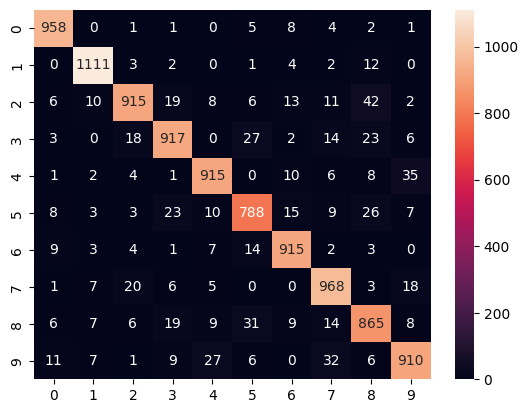

In [149]:
sns.heatmap(cm,annot=True,fmt='d')

In [150]:
model2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model2.compile(optimizer='Adam',loss=keras.losses.sparse_categorical_crossentropy,metrics=['Accuracy'])
model2.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2762 - Accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1304 - Accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0897 - Accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0675 - Accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0524 - Accuracy: 0.9838


In [151]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0807 - Accuracy: 0.9753


[0.08067633956670761, 0.9753000140190125]

In [152]:
yhat2=model2.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [153]:
yhat2[0]

array([6.4475951e-04, 1.2934924e-03, 1.1457360e-01, 8.5656202e-01,
       1.3286660e-05, 3.1079143e-02, 8.9131042e-08, 9.9997103e-01,
       6.3220076e-02, 2.1181053e-01], dtype=float32)

In [157]:
label_pre2=[np.argmax(i) for i in yhat2]

In [158]:
cm2=tf.math.confusion_matrix(labels=y_test,predictions=label_pre2)

<Axes: >

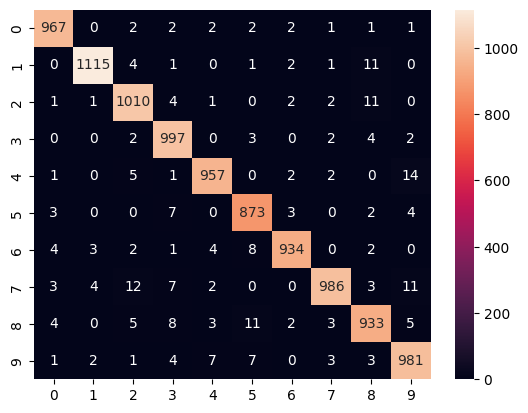

In [159]:
sns.heatmap(cm2,annot=True,fmt='d')